In [208]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import re
import xml.etree.ElementTree as ET
import xmltodict
import collections
import itertools
from scipy import stats
import statsmodels.api as sm 
import matplotlib.pyplot as plt
from ratelimit import limits, sleep_and_retry
from datetime import date
from dateutil.relativedelta import relativedelta
from random import sample
import sys
import gmaps
import folium

In [2]:
StateSelected = ['GA']

In [3]:
zipcodes=pd.read_csv('free-zipcode-database-Primary.csv')
zipcodes.head()

,Zipcode,State
0,705,PR
1,610,PR
2,611,PR
3,612,PR
4,601,PR


In [5]:
gazipcodes= zipcodes[zipcodes.State.isin(StateSelected)]

In [6]:
gazipcodes.count()

Zipcode    973
State      973
dtype: int64

# Perform API Calls from ATTOM to get Full Address List

In [7]:
FullAddress=[]
Street=[]
CityStateZip=[]
Latitude=[]
Longitude=[]
pd.Series(FullAddress)
pd.Series(Latitude)
pd.Series(Longitude)

Data_set=pd.DataFrame({'FullAddress':pd.Series(FullAddress),'Street':pd.Series(Street),'CityStateZip':pd.Series(CityStateZip),'Latitude':pd.Series(Latitude),'Longitude':pd.Series(Longitude)})
Data_set.head()

,FullAddress,Street,CityStateZip,Latitude,Longitude


In [9]:
# params = {'accept': "application/json",
#           'apikey': "9d078487e223b1c4d54c3f3a3f628803"} 

# url=f"https://search.onboard-apis.com/propertyapi/v1.0.0/property/address?postalcode=postalcode&page=1&pagesize=100"

# for index, row in gazipcodes.iterrows():
#     postalcode=row['Zipcode']
#     url=f"https://search.onboard-apis.com/propertyapi/v1.0.0/property/address?postalcode={postalcode}&page=1&pagesize=1000"
#     res = requests.get(url,headers=params)
#     data =json.loads(res.text)
#     we=data
#     try:
#         d=pd.DataFrame(data['property'])
#         d['FullAddress']=d['address'].apply(lambda a:a['oneLine'])
#         d['Street']=d['address'].apply(lambda d:d['line1'])
#         d['CityStateZip']=d['address'].apply(lambda d:d['line2'])
#         d['Latitude']=d['location'].apply(lambda c:c['latitude'])
#         d['Longitude']=d['location'].apply(lambda b:b['longitude'])
#         datatoappend=d[['FullAddress','Street','CityStateZip','Latitude','Longitude']]
#         Data_set=Data_set.append(datatoappend)
        
#     except (KeyError, IndexError):
#         print("Missing field/result... skipping.")

In [ ]:
Data_set['Zillow format add']=Data_set['Street'].replace(" ", "+",regex=True)
Data_set['Zillow format Zipcity']=Data_set['CityStateZip'].replace(" ", "+",regex=True)
Data_set.head()

In [11]:
# We have total over 666,000 GA address data

# Randomly select 10,000 data sample

In [12]:
# create random index
# rindex =  np.array(sample(range(len(Data_set)), 10000))

# np.random.shuffle(rindex)

# # get 10,000 random rows from Data_set
# Data_set_random = Data_set.iloc[rindex]

In [13]:
# # split 10,000 dataset into 3 subsets
# data_random1=Data_set_random.iloc[0-3000:]
# data_random2=Data_set_random.iloc[3000-6000:]
# data_random3=Data_set_random.iloc[6000-10000:]

In [14]:
# data_random1.to_csv('data_random1.csv')
# data_random2.to_csv('data_random2.csv')
# data_random3.to_csv('data_random3.csv')

# Feed the address to Zillow API

In [15]:
# Example of getting 10 data from Zillow due to daily limit of 1000 calls
# We actually run 10 times of the following code since our sample size is 10,000
Data_set=Data_set.head(10)

In [16]:
zid = 'X1-ZWz1go72alddzf_8469v'

In [17]:
zpid=[]
zest=[]
addr =[]
city=[]
zipC=[]
type=[]
rooms=[]
sqft=[]
state=[]
lastsoldprice=[]
lastsolddate=[]
year_built=[]
c_value=[]
county=[]
lat =[]
lon =[]
Zindex =[]

for index, row in Data_set.iterrows():
    add=row['Zillow format add']
    statezip=row['Zillow format Zipcity']
    params2=f'{add}&citystatezip={statezip}'
    url2 = f"http://www.zillow.com/webservice/GetDeepSearchResults.htm?zws-id={zid}&address={params2}"
    
    response2 = requests.get(url2, params=params2)
    
    tree=ET.fromstring(response2.content)
    results=tree.findall('./response/results/result')
    
    if len(results)!=0:
        re=results[0] 
        dic=xmltodict.parse(ET.tostring(re))
        try: 
            
             Zid=dic['result'].get('zpid',np.nan)
             zestimate=dic['result']['zestimate']['amount'].get('#text',np.nan)
             strt=dic['result']['address'].get('street',np.nan)
             zip=dic['result']['address'].get('zipcode',np.nan)
             cit=dic['result']['address'].get('city',np.nan)
             price=dic['result'].get('lastSoldPrice',np.nan)
             solddate=dic['result'].get('lastSoldDate',np.nan)
             room=dic['result'].get('bedrooms',np.nan)
             usecode=dic['result'].get('useCode',np.nan)
             sqftt=dic['result'].get('finishedSqFt',np.nan)
             yearbuilt=dic['result'].get('yearBuilt',np.nan)
             contyvalue=dic['result'].get('taxAssessment',np.nan)
             Zindx =dic['result'].get('localRealEstate',np.nan)
             year_built.append(yearbuilt)
             lati=dic['result']['address'].get('latitude',np.nan)
             longi=dic['result']['address'].get('longitude',np.nan)
             lon.append(longi)
             lat.append(lati)
             zest.append(zestimate)
             zpid.append(Zid)
             addr.append(strt)
             zipC.append(zip)
             city.append(cit)
             lastsoldprice.append(price)
             rooms.append(room)
             type.append(usecode)
             sqft.append(sqftt)
             c_value.append(contyvalue)
             lastsolddate.append(solddate)
             Zindex.append(Zindx)
             longi=[]
             lati=[]
             Zindx=[]
             solddate=[]
             zestimate=[]
             Zid=[]
             price=[]
             room=[]
             usecode=[]
             sqftt=[]
             cit=[]
             usecode=[]
             yearbuilt=[]
             contyvalue=[]
             strt=[]
             print(f'got it updating')
             
        except (KeyError, IndexError):
             print(skip)

got it updating
got it updating
got it updating
got it updating
got it updating
got it updating
got it updating
got it updating


In [18]:
d=pd.DataFrame({'Zillow Id':pd.Series(zpid),'Zestimate':pd.Series(zest),'Street':pd.Series(addr),\
                'City':pd.Series(city),'ZipCode':pd.Series(zipC),'lastSold':pd.Series(lastsoldprice),\
                'Bedrooms':pd.Series(rooms),'typeofhome':pd.Series(type),'Squareft':pd.Series(sqft),\
                'YearBuilt':pd.Series(year_built),'CountTax':pd.Series(c_value),\
                'Latitude':pd.Series(lat),'Longitude':pd.Series(lon),'LastSoldDate':pd.Series(lastsolddate),\
                'Z_index':pd.Series(Zindex)})  

In [19]:
df=d.drop_duplicates(['Zillow Id'])
df.head()

,Zillow Id,Zestimate,Street,City,ZipCode,lastSold,Bedrooms,typeofhome,Squareft,YearBuilt,CountTax,Latitude,Longitude,LastSoldDate,Z_index
0,76449907,552170,2412 Mcdaniel Station Rd SW,CALHOUN,30701,NaN,3,SingleFamily,1835,1969,736770.0,34.428137,-84.96223,NaN,"{'region': {'@id': '23912', '@name': 'Calhoun'..."
1,2100336775,58143,2555 Mcdaniel Station Rd SW,Calhoun,30701,"{'@currency': 'USD', '#text': '48000'}",2,Mobile,NaN,1997,NaN,34.424662,-84.968148,09/09/2016,"{'region': {'@id': '23912', '@name': 'Calhoun'..."
2,76449885,111495,1707 Miller Ferry Rd SW,CALHOUN,30701,NaN,2,SingleFamily,1271,1950,105900.0,34.422659,-84.975192,NaN,"{'region': {'@id': '23912', '@name': 'Calhoun'..."
3,76449750,375266,225 Robbins Creek Trl SW,CALHOUN,30701,"{'@currency': 'USD', '#text': '5000'}",4,SingleFamily,4700,1999,331600.0,34.422825,-84.983753,07/11/2005,"{'region': {'@id': '3312', '@name': 'Adairsvil..."
4,76449749,411761,222 Robbins Creek Trl SW,CALHOUN,30701,"{'@currency': 'USD', '#text': '45000'}",6,SingleFamily,5092,2004,415400.0,34.422188,-84.981015,11/02/2012,"{'region': {'@id': '3312', '@name': 'Adairsvil..."


In [20]:
df['LastSold']=df['lastSold'].apply(lambda l: l.get('#text', np.nan) if isinstance(l, dict) else np.nan)
df['Zindex']=df['Z_index'].apply(lambda l: l.get('region', np.nan) if isinstance(l, dict) else np.nan)
df['Z_index']=df['Zindex'].apply(lambda l: l.get('zindexValue', np.nan) if isinstance(l, dict) else np.nan)
df.head()

,Zillow Id,Zestimate,Street,City,ZipCode,lastSold,Bedrooms,typeofhome,Squareft,YearBuilt,CountTax,Latitude,Longitude,LastSoldDate,Z_index,LastSold,Zindex
0,76449907,552170,2412 Mcdaniel Station Rd SW,CALHOUN,30701,NaN,3,SingleFamily,1835,1969,736770.0,34.428137,-84.96223,NaN,"126,700",NaN,"{'@id': '23912', '@name': 'Calhoun', '@type': ..."
1,2100336775,58143,2555 Mcdaniel Station Rd SW,Calhoun,30701,"{'@currency': 'USD', '#text': '48000'}",2,Mobile,NaN,1997,NaN,34.424662,-84.968148,09/09/2016,"126,700",48000,"{'@id': '23912', '@name': 'Calhoun', '@type': ..."
2,76449885,111495,1707 Miller Ferry Rd SW,CALHOUN,30701,NaN,2,SingleFamily,1271,1950,105900.0,34.422659,-84.975192,NaN,"126,700",NaN,"{'@id': '23912', '@name': 'Calhoun', '@type': ..."
3,76449750,375266,225 Robbins Creek Trl SW,CALHOUN,30701,"{'@currency': 'USD', '#text': '5000'}",4,SingleFamily,4700,1999,331600.0,34.422825,-84.983753,07/11/2005,"124,300",5000,"{'@id': '3312', '@name': 'Adairsville', '@type..."
4,76449749,411761,222 Robbins Creek Trl SW,CALHOUN,30701,"{'@currency': 'USD', '#text': '45000'}",6,SingleFamily,5092,2004,415400.0,34.422188,-84.981015,11/02/2012,"124,300",45000,"{'@id': '3312', '@name': 'Adairsville', '@type..."


# Combine data and clean data

In [21]:
# combine data and get 5698 observations



In [12]:
combined_data = pd.read_csv('Combineddata.csv')
combined_data.City=combined_data.City.map(lambda x: x.upper())
combined_data.head()

,Unnamed: 0,Zillow Id,Zestimate,Street,City,ZipCode,lastSold,Bedrooms,typeofhome,Squareft,YearBuilt,CountTax,Latitude,Longitude,LastSoldDate,Z_index,LastSold,Zindex
0,0,93123448,345560.0,256 Buckshot Ln,TIGER,30576.0,"OrderedDict([('@currency', 'USD'), ('#text', '...",4.0,SingleFamily,4200.0,2001.0,290723.0,34.822040,-83.446890,10/1/2002,"165,300",285000.0,"OrderedDict([('@id', '14139'), ('@name', 'Tige..."
1,1,82452558,155747.0,65 Sunrise Dr,GRANTVILLE,30220.0,"OrderedDict([('@currency', 'USD'), ('#text', '...",4.0,SingleFamily,1496.0,2006.0,118800.0,33.229140,-84.825290,11/19/2010,"113,700",54000.0,"OrderedDict([('@id', '45530'), ('@name', 'Gran..."
2,2,111793656,58879.0,2085 Jackson Rd,ROBERTA,31078.0,"OrderedDict([('@currency', 'USD'), ('#text', '...",3.0,Mobile,1152.0,1995.0,57838.0,32.692290,-83.950920,2/12/2018,NaN,56750.0,"OrderedDict([('@id', '18858'), ('@name', 'Knox..."
3,3,2139757076,150542.0,6301 Chief O F Love Rd B-5,SAVANNAH,31419.0,NaN,2.0,Condominium,1300.0,2008.0,NaN,31.993879,-81.281182,NaN,NaN,NaN,"OrderedDict([('@id', '763636'), ('@name', 'The..."
4,4,221933009,233334.0,1900 Bell Ln,BRASELTON,30517.0,"OrderedDict([('@currency', 'USD'), ('#text', '...",0.0,SingleFamily,2653.0,2006.0,192468.0,34.108109,-83.790392,5/26/2017,"275,900",210999.0,"OrderedDict([('@id', '41949'), ('@name', 'Bras..."


In [173]:
combined_data_selected=combined_data[['Zestimate', 'City','ZipCode','Street','Bedrooms', 'LastSoldDate','typeofhome', 
                                      'Squareft', 'YearBuilt', 'CountTax','LastSold','Z_index','Longitude','Latitude']]

In [174]:
combined_data_selected.head()

,Zestimate,City,ZipCode,Street,Bedrooms,LastSoldDate,typeofhome,Squareft,YearBuilt,CountTax,LastSold,Z_index,Longitude,Latitude
0,345560.0,TIGER,30576.0,256 Buckshot Ln,4.0,10/1/2002,SingleFamily,4200.0,2001.0,290723.0,285000.0,"165,300",-83.446890,34.822040
1,155747.0,GRANTVILLE,30220.0,65 Sunrise Dr,4.0,11/19/2010,SingleFamily,1496.0,2006.0,118800.0,54000.0,"113,700",-84.825290,33.229140
2,58879.0,ROBERTA,31078.0,2085 Jackson Rd,3.0,2/12/2018,Mobile,1152.0,1995.0,57838.0,56750.0,NaN,-83.950920,32.692290
3,150542.0,SAVANNAH,31419.0,6301 Chief O F Love Rd B-5,2.0,NaN,Condominium,1300.0,2008.0,NaN,NaN,NaN,-81.281182,31.993879
4,233334.0,BRASELTON,30517.0,1900 Bell Ln,0.0,5/26/2017,SingleFamily,2653.0,2006.0,192468.0,210999.0,"275,900",-83.790392,34.108109


# compare zestimate and lastsold, find most investable areas

In [209]:
df2=combined_data_selected.dropna(how='any')

In [210]:
df2['Difference']=(df2['Zestimate']-df2['LastSold'])/df2['LastSold']
df2['Market Value']=2.5*df2['CountTax']



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [211]:
df2['LastSoldDate'].astype(date)
df2['YearSold']= pd.to_datetime(df2['LastSoldDate']).dt.to_period('y')
df2['YearBuilt']=pd.to_datetime(df2['YearBuilt']).dt.to_period('y')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [213]:
# compare difference among houses sold within 10 yeas

df2['lalala']=date.today()-relativedelta(years=+10)
df2['lalala']=pd.to_datetime(df2['lalala']).dt.to_period('y')
df2.head()

,Zestimate,City,ZipCode,Street,Bedrooms,LastSoldDate,typeofhome,Squareft,YearBuilt,CountTax,LastSold,Z_index,Longitude,Latitude,Difference,Market Value,YearSold,lalala
0,345560.0,TIGER,30576.0,256 Buckshot Ln,4.0,10/1/2002,SingleFamily,4200.0,1970,290723.0,285000.0,"165,300",-83.446890,34.822040,0.212491,726807.5,2002,2008
1,155747.0,GRANTVILLE,30220.0,65 Sunrise Dr,4.0,11/19/2010,SingleFamily,1496.0,1970,118800.0,54000.0,"113,700",-84.825290,33.229140,1.884204,297000.0,2010,2008
4,233334.0,BRASELTON,30517.0,1900 Bell Ln,0.0,5/26/2017,SingleFamily,2653.0,1970,192468.0,210999.0,"275,900",-83.790392,34.108109,0.105854,481170.0,2017,2008
11,57489.0,ALBANY,31705.0,4860 Pinto Dr,3.0,2/23/2016,SingleFamily,1375.0,1970,62000.0,58000.0,"82,500",-84.102703,31.460254,-0.008810,155000.0,2016,2008
16,211563.0,NORCROSS,30093.0,765 Kenneth Ln,3.0,2/2/1999,SingleFamily,2327.0,1970,171200.0,132000.0,"149,300",-84.179266,33.889257,0.602750,428000.0,1999,2008


In [214]:
df2=df2[df2['LastSold']>30000]
df2=df2[df2['YearSold']>df2['YearBuilt']]
df2=df2[df2['YearSold']>df2['lalala']]
df2.sort_values('Difference',ascending=False)

,Zestimate,City,ZipCode,Street,Bedrooms,LastSoldDate,typeofhome,Squareft,YearBuilt,CountTax,LastSold,Z_index,Longitude,Latitude,Difference,Market Value,YearSold,lalala
3380,442942.0,APPLING,30802.0,2627 Dozier Rd,4.0,10/11/2012,SingleFamily,3028.0,1970,363761.0,40000.0,"186,900",-82.338162,33.564949,10.073550,909402.5,2012,2008
4412,1219257.0,BRASELTON,30517.0,1908 Sam Snead Dr,5.0,12/18/2015,SingleFamily,9507.0,1970,895400.0,130200.0,"275,900",-83.842844,34.094647,8.364493,2238500.0,2015,2008
3217,285595.0,DACULA,30019.0,3197 Dolostone Way,5.0,03/17/2015,SingleFamily,2635.0,1970,243900.0,40000.0,"237,800",-83.868770,33.910677,6.139875,609750.0,2015,2008
4988,253614.0,ATLANTA,30314.0,969 Parsons St SW,5.0,4/27/2016,SingleFamily,2160.0,1970,37000.0,37000.0,"55,700",-84.419279,33.751299,5.854432,92500.0,2016,2008
5637,241274.0,DECATUR,30032.0,2772 Kelly Lake Rd,4.0,02/14/2013,SingleFamily,2314.0,1970,129600.0,37000.0,"103,800",-84.277362,33.717461,5.520919,324000.0,2013,2008
2531,184865.0,GROVETOWN,30813.0,5379 Cemetery Rd,5.0,08/13/2018,SingleFamily,2490.0,1970,24218.0,35000.0,"147,400",-82.216997,33.425798,4.281857,60545.0,2018,2008
2901,173988.0,ATLANTA,30310.0,1900 Brandywine St SW,3.0,06/30/2016,SingleFamily,1094.0,1970,34000.0,34000.0,"57,800",-84.416814,33.702943,4.117294,85000.0,2016,2008
2565,162578.0,WINSTON,30187.0,7331 Post Rd,3.0,09/29/2012,SingleFamily,2112.0,1970,124500.0,35000.0,"171,800",-84.861018,33.605610,3.645086,311250.0,2012,2008
4111,399694.0,ATLANTA,30307.0,1140 Hardee St NE,3.0,05/04/2015,SingleFamily,1218.0,1970,88500.0,88500.0,"291,000",-84.350380,33.755652,3.516316,221250.0,2015,2008
2578,333337.0,LAVONIA,30553.0,9035 Highway 59,3.0,12/20/2010,SingleFamily,2969.0,1970,222917.0,75000.0,"133,100",-83.156102,34.419714,3.444493,557292.5,2010,2008


In [219]:
mean_diff=df2.groupby(['City','ZipCode','Longitude','Latitude','Market Value','LastSold'])['Difference'].mean().reset_index()
mean_diff=mean_diff.rename(columns={'Difference':'Diff_mean'})
mean_diff = mean_diff.sort_values(['Diff_mean','City','ZipCode'], ascending=[False,True,True])
mean_diff.head(10)
len(mean_diff)

756

In [218]:
# Make an empty map

mean_diff['Longitude']=mean_diff['Longitude'].astype(float)
mean_diff['Latitude']=mean_diff['Latitude'].astype(float)
mean_diff=mean_diff[mean_diff['Diff_mean']>0.2]

meandiff2=mean_diff[['Latitude','Longitude','ZipCode']]
meandiff2=meandiff2.dropna(how='any')
meandiff2['Longitude']=meandiff2['Longitude'].astype(float)
meandiff2['Latitude']=meandiff2['Latitude'].astype(float)


In [204]:
m = folium.Map(location=[20, 0], tiles="Mapbox Bright", zoom_start=2)
# I can add marker one by one on the map
for i in range(0,len(meandiff2)):
    folium.Marker([meandiff2['Latitude'],meandiff2['Longitude']], popup=meandiff2['ZipCode']).add_to(m)


TypeError: cannot convert the series to <class 'float'>

# Multivariate Regression:

In [32]:
df_zestimate=combined_data[['Zestimate', 'Bedrooms','YearBuilt','Squareft']]
df_lastsold=combined_data[['LastSold', 'Bedrooms','YearBuilt','Squareft']]

df_zestimate=df_zestimate.dropna(how='any')
df_lastsold=df_lastsold.dropna(how='any')

df_zestimate=df_zestimate[df_zestimate['Zestimate']<500000]
df_zestimate=df_zestimate[df_zestimate['Squareft']<10000]

df_lastsold=df_lastsold[df_lastsold['LastSold']<500000]
df_lastsold=df_lastsold[df_lastsold['Squareft']<10000]

In [34]:
X = df_zestimate[['Squareft', 'Bedrooms', 'YearBuilt']]
Y = df_zestimate['Zestimate']

X1 = sm.add_constant(X)
reg = sm.OLS(Y.astype(float), X1.astype(float)).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Zestimate   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     798.3
Date:                Mon, 08 Oct 2018   Prob (F-statistic):               0.00
Time:                        19:45:44   Log-Likelihood:                -43142.
No. Observations:                3380   AIC:                         8.629e+04
Df Residuals:                    3376   BIC:                         8.632e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.762e+05   1.18e+05     -6.573      0.000   -1.01e+06   -5.45e+05
Squareft      81.6844      2.040     40.038      0.000      77.684      85.685
Bedrooms    5998.5196   1227.377      4.887      0.000    3592.043    8404.997
YearBuilt    393.1835     60.056      6.547      0.000     275.433     510.934
==============================================================================
Omnibus:                      714.648   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1948.709
Skew:                           1.117   Prob(JB):                         0.00
Kurtosis:                       5.974   Cond. No.                     2.22e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.22e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
X = df_lastsold[['Squareft', 'Bedrooms', 'YearBuilt']]
Y = df_lastsold['LastSold']

X1 = sm.add_constant(X)
reg = sm.OLS(Y.astype(float), X1.astype(float)).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               LastSold   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     329.4
Date:                Mon, 08 Oct 2018   Prob (F-statistic):          9.49e-178
Time:                        19:45:49   Log-Likelihood:                -29307.
No. Observations:                2291   AIC:                         5.862e+04
Df Residuals:                    2287   BIC:                         5.865e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.516e+05   1.58e+05     -4.114      0.000   -9.62e+05   -3.41e+05
Squareft      63.2633      2.495     25.361      0.000      58.372      68.155
Bedrooms     141.6734   1869.245      0.076      0.940   -3523.920    3807.267
YearBuilt    335.6311     80.353      4.177      0.000     178.060     493.203
==============================================================================
Omnibus:                      238.111   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              651.840
Skew:                           0.567   Prob(JB):                    2.85e-142
Kurtosis:                       5.355   Cond. No.                     2.48e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.48e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
X = df_zestimate[['Squareft', 'Bedrooms']]
Y = df_zestimate['Zestimate']

X1 = sm.add_constant(X)
reg = sm.OLS(Y.astype(float), X1.astype(float)).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Zestimate   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     1162.
Date:                Mon, 08 Oct 2018   Prob (F-statistic):               0.00
Time:                        19:45:53   Log-Likelihood:                -43164.
No. Observations:                3380   AIC:                         8.633e+04
Df Residuals:                    3377   BIC:                         8.635e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3569.7802   4070.355     -0.877      0.381   -1.16e+04    4410.829
Squareft      83.4960      2.034     41.054      0.000      79.508      87.484
Bedrooms    7252.1396   1219.839      5.945      0.000    4860.441    9643.838
==============================================================================
Omnibus:                      650.056   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1679.839
Skew:                           1.039   Prob(JB):                         0.00
Kurtosis:                       5.758   Cond. No.                     5.51e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
X = df_lastsold[['Squareft', 'Bedrooms']]
Y = df_lastsold['LastSold']

X1 = sm.add_constant(X)
reg = sm.OLS(Y.astype(float), X1.astype(float)).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               LastSold   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     481.9
Date:                Mon, 08 Oct 2018   Prob (F-statistic):          2.26e-175
Time:                        19:45:57   Log-Likelihood:                -29316.
No. Observations:                2291   AIC:                         5.864e+04
Df Residuals:                    2288   BIC:                         5.866e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9547.7703   5532.681      1.726      0.085   -1301.824    2.04e+04
Squareft      64.9021      2.472     26.252      0.000      60.054      69.750
Bedrooms     858.9218   1868.020      0.460      0.646   -2804.267    4522.111
==============================================================================
Omnibus:                      208.272   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              538.076
Skew:                           0.514   Prob(JB):                    1.44e-117
Kurtosis:                       5.140   Cond. No.                     6.57e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
X = df_zestimate[['Squareft', 'YearBuilt']]
Y = df_zestimate['Zestimate']
X1 = sm.add_constant(X)
reg = sm.OLS(Y.astype(float), X1.astype(float)).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Zestimate   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     1178.
Date:                Mon, 08 Oct 2018   Prob (F-statistic):               0.00
Time:                        19:46:07   Log-Likelihood:                -43154.
No. Observations:                3380   AIC:                         8.631e+04
Df Residuals:                    3377   BIC:                         8.633e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.574e+05   1.17e+05     -7.309      0.000   -1.09e+06   -6.27e+05
Squareft      85.5220      1.889     45.265      0.000      81.818      89.226
YearBuilt    438.9738     59.521      7.375      0.000     322.272     555.676
==============================================================================
Omnibus:                      685.439   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1955.626
Skew:                           1.057   Prob(JB):                         0.00
Kurtosis:                       6.068   Cond. No.                     2.19e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
X = df_lastsold[['Squareft', 'YearBuilt']]
Y = df_lastsold['LastSold']
X1 = sm.add_constant(X)
reg = sm.OLS(Y.astype(float), X1.astype(float)).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               LastSold   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     494.3
Date:                Mon, 08 Oct 2018   Prob (F-statistic):          3.79e-179
Time:                        19:46:11   Log-Likelihood:                -29307.
No. Observations:                2291   AIC:                         5.862e+04
Df Residuals:                    2288   BIC:                         5.864e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.524e+05   1.58e+05     -4.131      0.000   -9.62e+05   -3.43e+05
Squareft      63.3575      2.163     29.297      0.000      59.117      67.598
YearBuilt    336.1906     79.995      4.203      0.000     179.319     493.062
==============================================================================
Omnibus:                      237.833   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              651.496
Skew:                           0.566   Prob(JB):                    3.38e-142
Kurtosis:                       5.355   Cond. No.                     2.47e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
X = df_zestimate[['Bedrooms', 'YearBuilt']]
Y = df_zestimate['Zestimate']
X1 = sm.add_constant(X)
reg = sm.OLS(Y.astype(float), X1.astype(float)).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Zestimate   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     268.5
Date:                Mon, 08 Oct 2018   Prob (F-statistic):          5.88e-109
Time:                        19:46:53   Log-Likelihood:                -43799.
No. Observations:                3380   AIC:                         8.760e+04
Df Residuals:                    3377   BIC:                         8.762e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.328e+06   1.42e+05     -9.326      0.000   -1.61e+06   -1.05e+06
Bedrooms    2.491e+04   1375.535     18.111      0.000    2.22e+04    2.76e+04
YearBuilt    719.2998     72.249      9.956      0.000     577.643     860.957
==============================================================================
Omnibus:                      419.643   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              595.565
Skew:                           0.950   Prob(JB):                    4.73e-130
Kurtosis:                       3.786   Cond. No.                     1.60e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
X = df_lastsold[['Bedrooms', 'YearBuilt']]
Y = df_lastsold['LastSold']
X1 = sm.add_constant(X)
reg = sm.OLS(Y.astype(float), X1.astype(float)).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               LastSold   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     134.7
Date:                Mon, 08 Oct 2018   Prob (F-statistic):           5.06e-56
Time:                        19:46:56   Log-Likelihood:                -29591.
No. Observations:                2291   AIC:                         5.919e+04
Df Residuals:                    2288   BIC:                         5.921e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.238e+06   1.77e+05     -6.982      0.000   -1.59e+06    -8.9e+05
Bedrooms    2.375e+04   1834.267     12.951      0.000    2.02e+04    2.74e+04
YearBuilt    656.1280     89.801      7.306      0.000     480.029     832.227
==============================================================================
Omnibus:                      344.652   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              548.424
Skew:                           1.023   Prob(JB):                    8.15e-120
Kurtosis:                       4.250   Cond. No.                     1.71e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
X = df_zestimate['Squareft']
Y = df_zestimate['Zestimate']
X1 = sm.add_constant(X)
reg = sm.OLS(Y.astype(float), X1.astype(float)).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Zestimate   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     2265.
Date:                Mon, 08 Oct 2018   Prob (F-statistic):               0.00
Time:                        19:46:58   Log-Likelihood:                -43181.
No. Observations:                3380   AIC:                         8.637e+04
Df Residuals:                    3378   BIC:                         8.638e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7391.0201   3647.277      2.026      0.043     239.927    1.45e+04
Squareft      88.5127      1.860     47.591      0.000      84.866      92.159
==============================================================================
Omnibus:                      600.469   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1632.570
Skew:                           0.948   Prob(JB):                         0.00
Kurtosis:                       5.828   Cond. No.                     4.86e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# House Price Index trend

In [98]:
file=pd.read_csv('ATXRNSA.csv')
file.head()


,DATE,ATXRNSA
0,1991-01-01,69.610578
1,1991-02-01,69.172916
2,1991-03-01,69.047657
3,1991-04-01,69.401637
4,1991-05-01,69.688718


In [128]:
file['Month-year']=pd.to_datetime(file['DATE']).dt.to_period('m')
file.head()


,DATE,ATXRNSA,Month-year
0,1991-01-01,69.610578,1991-01
1,1991-02-01,69.172916,1991-02
2,1991-03-01,69.047657,1991-03
3,1991-04-01,69.401637,1991-04
4,1991-05-01,69.688718,1991-05


In [145]:
file2=file.groupby(['Month-year'])['ATXRNSA'].mean()
#mean_diff=df2.groupby(['City','ZipCode','Longitude','Latitude'])['Difference'].mean().reset_index()
file3=pd.DataFrame(file2).reset_index()
# file3=file3.set_index(file3['Month-year'])
# file3=file3[['ATXRNSA']].reset_index()
# file3=file3.set_index('Month-year')
file3.head()

,Month-year,ATXRNSA
0,1991-01,69.610578
1,1991-02,69.172916
2,1991-03,69.047657
3,1991-04,69.401637
4,1991-05,69.688718


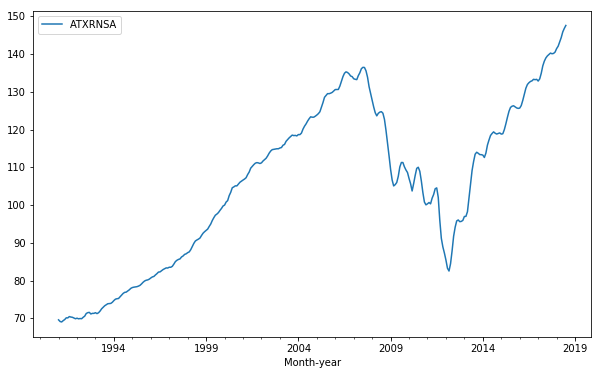

In [171]:
count_chart = file3.plot(kind='line',x='Month-year',y='ATXRNSA',figsize=(10, 6))

# Type of homes

In [49]:
Hometype=combined_data.groupby(['typeofhome'])['Zillow Id'].count()
Homes=pd.DataFrame({'type':Hometype}).reset_index()
Homes

,typeofhome,type
0,Apartment,7
1,Condominium,145
2,Duplex,20
3,Miscellaneous,4
4,Mobile,670
5,MultiFamily2To4,21
6,MultiFamily5Plus,2
7,SingleFamily,4638
8,Townhouse,52
9,Triplex,1


In [52]:
Homes["typeofhome"] = Homes["typeofhome"].replace({"Unknown": "Other", "Triplex": "Other", 
                                                   "Miscellaneous": "Other", "MultiFamily2To4": "Other",
                                                   "MultiFamily5Plus": "Other", "Townhouse": "Condominium",
                                                   "VacantResidentialLand": "Other", "Apartment": "Other",
                                                  "Duplex": "Other"})

In [51]:
Home2 = Homes.groupby("typeofhome")['type'].sum()
Home2

typeofhome
Condominium      197
Mobile           670
Other            193
SingleFamily    4638
Name: type, dtype: int64

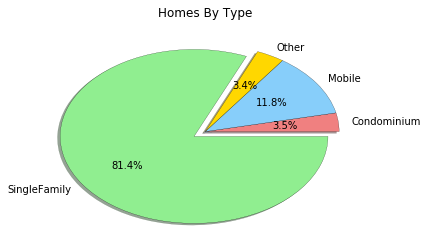

In [57]:
#Build Pie Chart
type_city = Home2.index
colors=["lightcoral","lightskyblue","gold", "lightgreen", "pink"]
explode=[0,0,0,0.1]
plt.pie(Home2,explode=explode,labels=type_city,colors=colors,autopct="%1.1f%%",shadow=True,wedgeprops = {'linewidth': .2, 'edgecolor': 'black'},startangle=0)
plt.title('Homes By Type')
plt.show()
# plt.savefig("Homes_Type.png")

# Heat map


In [53]:
comb = combined_data[['Latitude', 'Longitude','Zestimate', 'City', 'Squareft', 'typeofhome']]

comb=comb[comb['Zestimate']<500000]
comb=comb[comb['Squareft']<10000]

comb.head()

,Latitude,Longitude,Zestimate,City,Squareft,typeofhome
0,34.822040,-83.446890,345560.0,TIGER,4200.0,SingleFamily
1,33.229140,-84.825290,155747.0,GRANTVILLE,1496.0,SingleFamily
2,32.692290,-83.950920,58879.0,ROBERTA,1152.0,Mobile
3,31.993879,-81.281182,150542.0,SAVANNAH,1300.0,Condominium
4,34.108109,-83.790392,233334.0,BRASELTON,2653.0,SingleFamily


In [54]:
comb1 = comb.dropna(how='any')

In [55]:
locations = comb1[['Latitude', 'Longitude']].astype(float)
weights = comb1['Zestimate']
fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(locations, weights=weights))
fig

Figure(layout=FigureLayout(height='420px'))

KeyError: 'Longitude'